### Build CNN Model for MNIST Handwritten Digit Classification Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

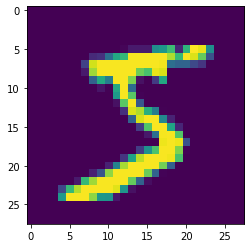

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train.max()

255

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train.max()

1.0

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train[0].shape

(28, 28, 1)

In [15]:
input_shape = X_train[0].shape

In [16]:
model = Sequential()
# Add 2 convulational layers
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
# Add Maxpool layer and Dropout layer
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
# Add Flatten layer and dense layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.50))
# Add output layer
model.add(Dense(10,activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [19]:
# Compile Model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
# Training our Model
History = model.fit(X_train,y_train,batch_size=(128),verbose=1,epochs=10,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.2304 - accuracy: 0.9305 - val_loss: 0.0539 - val_accuracy: 0.9821
Epoch 2/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0820 - accuracy: 0.9753 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 4/10
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.0361 - val_accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 195s 3ms/sample - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0295 - val_accuracy: 0.9907
Epoch 7/10
60000/60000 [==========================

In [21]:
# Testing accuracy
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 6s 600us/sample - loss: 0.0300 - accuracy: 0.9926


[0.029994001171027365, 0.9926]

In [22]:
History.history

{'loss': [0.23043010117610296,
  0.08199755631883938,
  0.06146282350619634,
  0.05100870200147231,
  0.04427845725814501,
  0.03888022839799524,
  0.033744240538279215,
  0.031540594696998596,
  0.028799879153817893,
  0.02571279963279764],
 'accuracy': [0.93046665,
  0.97533333,
  0.9815,
  0.9841667,
  0.9861,
  0.98805,
  0.9891833,
  0.98978335,
  0.9906167,
  0.9921],
 'val_loss': [0.053877633195742965,
  0.04002474092417396,
  0.041577431857213375,
  0.0361119171559636,
  0.03302387163781095,
  0.029516712627746165,
  0.026574327901177457,
  0.028979628865071574,
  0.02788701028740543,
  0.029993999958295173],
 'val_accuracy': [0.9821,
  0.9875,
  0.9871,
  0.9894,
  0.9893,
  0.9907,
  0.9915,
  0.9909,
  0.992,
  0.9926]}

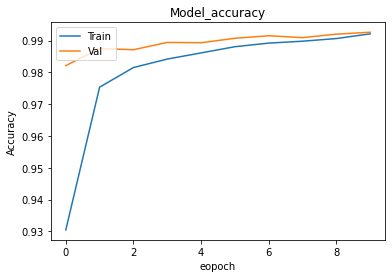

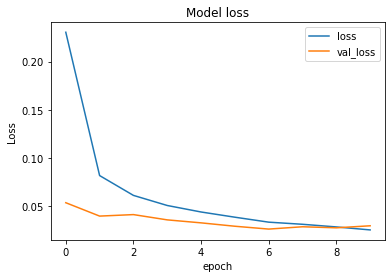

In [23]:
# ploting training and validation accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('eopoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# ploting training and validation loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'],loc='upper right')

#### After some no of epochs model training and validation accuracy values are same values that mean there is no Overfitting and Underfitting case and here we got `'99.3% accuracy'`.